This notebook explores the key concepts of linear algebra that are crucial for understanding machine learning models.
We will cover:
- Vectors and matrices
- Matrix rank, determinants
- Inverses, left/right inverses, and pseudo-inverse
- Applications in ML: Linear Regression, Ridge, PCA
- Visualizations to understand approximations and errors

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')


# matrix and vectors

In [14]:
# Example vectors
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

print("Dot product:", np.dot(v1, v2))
print("Norm of v1:", np.linalg.norm(v1))

# Example matrix
A = np.array([[1, 2], [3, 4]])
print("Transpose:\n", A.T)


Dot product: 32
Norm of v1: 3.7416573867739413
Transpose:
 [[1 3]
 [2 4]]


# Rank and determinant

Rank of B: 3
Determinant of B: 0.39108035578702727


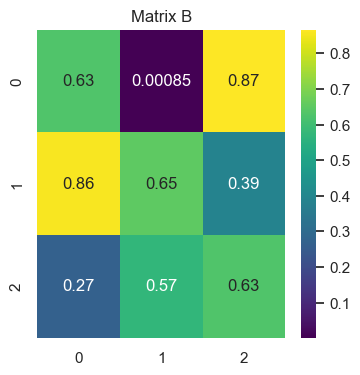

In [15]:
B = np.random.rand(3, 3)
print("Rank of B:", np.linalg.matrix_rank(B))
print("Determinant of B:", np.linalg.det(B))

# Heatmap visualization
plt.figure(figsize=(4,4))
sns.heatmap(B, annot=True, cmap='viridis')
plt.title("Matrix B")
plt.show()


# Inverse, Left/Right Inverse, Pseudo-Inverse

In [16]:
# Square matrix inverse
A = np.array([[1, 2], [3, 4]])
A_inv = np.linalg.inv(A)
print("A_inv:\n", A_inv)

# Tall matrix (left inverse)
X = np.random.rand(5, 3)
left_inv = np.linalg.inv(X.T @ X) @ X.T
print("Left inverse check:", np.allclose(left_inv @ X, np.eye(3)))

# Wide matrix (right inverse)
Y = np.random.rand(3, 5)
right_inv = Y.T @ np.linalg.inv(Y @ Y.T)
print("Right inverse check:", np.allclose(Y @ right_inv, np.eye(3)))

# Pseudo-inverse
A_rect = np.random.rand(5,3)
A_pinv = np.linalg.pinv(A_rect)
print("Pseudo-inverse shape:", A_pinv.shape)


A_inv:
 [[-2.   1. ]
 [ 1.5 -0.5]]
Left inverse check: True
Right inverse check: True
Pseudo-inverse shape: (3, 5)


# Linear Regression via Pseudo-Inverse

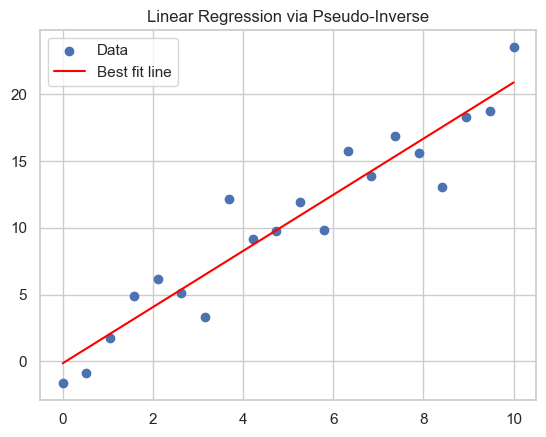

Slope, intercept: [ 2.10328474 -0.14998094]


In [17]:
# Generate data
X = np.linspace(0, 10, 20).reshape(-1,1)
y = 2*X.flatten() + np.random.randn(20)*3
X_design = np.hstack([X, np.ones_like(X)])

# Pseudo-inverse solution
w = np.linalg.pinv(X_design) @ y
y_pred = X_design @ w

# Plot
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Best fit line')
plt.title("Linear Regression via Pseudo-Inverse")
plt.legend()
plt.show()

print("Slope, intercept:", w)


# Singular Matrix Example

In [18]:
A_sing = np.array([[1, 2, 3],
                   [2, 4, 6],
                   [3, 6, 9]])
b = np.array([1, 2, 3])

try:
    x_ls = np.linalg.inv(A_sing.T @ A_sing) @ A_sing.T @ b
except np.linalg.LinAlgError:
    print("Normal inverse fails (matrix singular)")

x_pinv = np.linalg.pinv(A_sing) @ b
print("Pseudo-inverse works:", x_pinv)


Normal inverse fails (matrix singular)
Pseudo-inverse works: [0.07142857 0.14285714 0.21428571]


# PCA (via SVD)

In [19]:
# Generate sample 2D data
X = np.random.rand(100,2)
X_centered = X - X.mean(axis=0)

# Covariance
cov = X_centered.T @ X_centered / len(X)
eigenvalues, eigenvectors = np.linalg.eig(cov)
idx = eigenvalues.argsort()[::-1]
components = eigenvectors[:, idx]

print("Principal components:\n", components)


Principal components:
 [[ 0.68733508 -0.72634047]
 [-0.72634047 -0.68733508]]


# Visualizations of Matrices

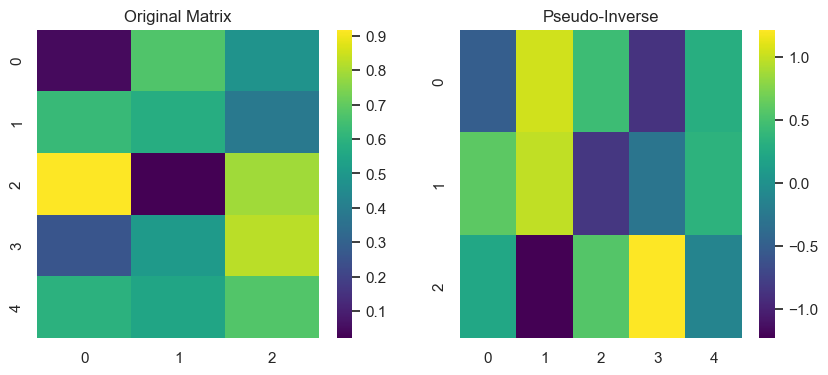

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(A_rect, cmap='viridis', annot=False)
plt.title("Original Matrix")

plt.subplot(1,2,2)
sns.heatmap(A_pinv, cmap='viridis', annot=False)
plt.title("Pseudo-Inverse")
plt.show()


# - Left/right inverse: useful for full-rank rectangular matrices
- Pseudo-inverse: robust, works for all matrices, basis for Least Squares
- Real-world data is noisy → pseudo-inverse gives best approximation
- Linear algebra is foundational for ML (Regression, PCA, Ridge, etc.)
